## **PPG10_s2 - TIME SERIES**  



### **Note for Students:**

You must work **inside the `week10_s2` folder of your personal GitHub repository** for this activity.

The CSV file used in **PPG10_s2** will be generated from **Slide 45 of the Time Series presentation**, which shows the **monthly number of air passengers in the USA from January 1949 to December 1960**. The data will be extracted using the **Automeris.io WebPlotDigitizer** tool.

You must **carefully reproduce each data point exactly as shown** to preserve the accuracy and integrity of the original time series.

The resulting file should be saved as **`pas_year.csv`** and used throughout the activity for all relevant questions.

At the end of the session, you are required to **commit and push your work** to your personal GitHub repository. Your submission must include:

- The `pas_year.csv` file  
- All Python scripts or notebooks  
- Any plots or result files generated during the activity  

Use a clear and descriptive commit message (e.g., `"PPG10_s2 submission"`).

---
---

1. **Define a time series.**  
   Explain its main components and how it differs from panel data or cross-sectional data.



In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

* A time series is a sequence of data points collected or recorded at successive time intervals. It is used to analyze trends, patterns, and variations over time.

* Main Components of a Time Series:

Trend (
𝑇
𝑡
T 
t
​
 )

The long-term movement of the data, showing an increasing, decreasing, or stable pattern.

Seasonality (
𝑆
𝑡
S 
t
​
 )

Regular and predictable fluctuations that occur at fixed intervals, such as daily, monthly, or yearly cycles (e.g., higher air travel in summer).

Cyclical Component (
𝐶
𝑡
C 
t
​
 )

Long-term oscillations influenced by economic or business cycles, lasting more than a year. Unlike seasonality, these fluctuations are not strictly periodic.

Random Component (
𝑅
𝑡
R 
t
​
 )

Unpredictable variations caused by unforeseen factors, representing noise in the data.

2. **Based on the provided CSV file, what is the frequency of the series?**  
   Justify whether it is monthly, quarterly, daily, etc., based on the time values.



* The frequency of a time series refers to how often data points are recorded. Based on the CSV file, which contains data from January 1949 to December 1960, 
the time values represent months over multiple years.

    So the frequency of the series is monthly.

3. **What does it mean for a time series to be stationary?**  
   Name one method to test for stationarity and explain what it implies if the series is non-stationary.



* A time series is stationary if its statistical properties (mean, variance, and autocorrelation) remain constant over time.

* Augmented Dickey-Fuller (ADF) Test or Unit Root Test: It is the most popular statistical test to know if the dataset is stationary or not
and with the following assumptions:

    • Null Hypothesis (H0 ): Series is non-stationary

    • Alternate Hypothesis (HA ): Series is stationary

    • p-value >0.05 Fail to reject (H0 )

    • p-value <= 0.05 Accept (HA )

* If is non-stationary, it means:

    The mean or variance changes over time, making predictions unreliable.

    The series may exhibit a trend or seasonal pattern that needs to be removed before modeling.

    Transformations like differencing or log transformations are required to make the data stationary before applying time series models.

4. **Give two real-world examples where time series are used.**  
   Briefly explain their practical applications.



* Example 1: Predicting daily temperatures, rainfall, or wind speed.

    Application: Meteorologists use historical weather data to model and forecast future conditions. Time series models help in climate change analysis, disaster preparedness, and agriculture planning.

* Example 2:  Analyzing daily closing prices of stocks (e.g., Apple, Tesla).

    Application: Investors and analysts use time series models to detect trends, forecast future stock prices, and develop trading strategies. Techniques like ARIMA or LSTM neural networks help predict price movements.

5. **Transform the provided CSV so that each observation includes the year, month, and day.**  
   Use Python. Include the code and briefly explain what it does.



In [32]:
import plotly.express as px

In [28]:
file_path = "pas_year.csv"  # Asegúrate de que este archivo está en el mismo directorio
df = pd.read_csv(file_path, header=None, names=["Time", "Passengers"], sep=';', parse_dates=["Time"])

In [30]:
# Crear nuevas columnas para el año, mes y día
df["Year"] = df["Time"].dt.year
df["Month"] = df["Time"].dt.month
df["Day"] = df["Time"].dt.day

display(df.head(10))

,Time,Passengers,Year,Month,Day
0,1949-05-09,"125,77639751552795",1949,5,9
1,1949-06-13,"132,76397515527958",1949,6,13
2,1949-07-18,"144,4099378881989",1949,7,18
3,1949-08-04,"142,08074534161494",1949,8,4
4,1949-09-02,"132,76397515527958",1949,9,2
5,1949-10-01,"144,4099378881989",1949,10,1
6,1949-10-30,"160,71428571428578",1949,10,30
7,1949-12-04,"160,71428571428578",1949,12,4
8,1949-12-27,"146,73913043478262",1949,12,27
9,1950-02-06,"132,76397515527958",1950,2,6


6. **Plot the evolution of the measured variable over time.**  
   Use Plotly. Add title, labels, and explain whether a trend can be visually detected.



In [33]:
# Crear el gráfico de la evolución de los pasajeros a lo largo del tiempo
fig = px.line(df, x="Time", y="Passengers", title="Evolución del número de pasajeros a lo largo del tiempo",
              labels={"Time": "Fecha", "Passengers": "Número de pasajeros"})

# Mostrar el gráfico
fig.show()

7. **Apply the ADF (Augmented Dickey-Fuller) test to the time series from the CSV.**  
   - What is the null hypothesis?  
   - What result do you obtain, and what does it imply about the stationarity of the data?



In [34]:
from statsmodels.tsa.stattools import adfuller

In [36]:

# Convertir la columna 'Passengers' a formato numérico, reemplazando las comas por puntos
df["Passengers"] = df["Passengers"].str.replace(",", ".").astype(float)


In [37]:
result = adfuller(df["Passengers"])

In [38]:
# Mostrar los resultados del test ADF
print("Resultado del Test ADF:")
print(f"Estadístico de la prueba ADF: {result[0]}")
print(f"Valor p: {result[1]}")
print(f"Valor crítico (1%): {result[4]['1%']}")
print(f"Valor crítico (5%): {result[4]['5%']}")
print(f"Valor crítico (10%): {result[4]['10%']}")

Resultado del Test ADF:
Estadístico de la prueba ADF: 0.7956945025266231
Valor p: 0.9915663503975671
Valor crítico (1%): -3.4816817173418295
Valor crítico (5%): -2.8840418343195267
Valor crítico (10%): -2.578770059171598


In [39]:
# Interpretar el resultado
if result[1] < 0.05:
    print("\nConclusión: Rechazamos la hipótesis nula. La serie temporal es estacionaria.")
else:
    print("\nConclusión: No rechazamos la hipótesis nula. La serie temporal no es estacionaria.")


Conclusión: No rechazamos la hipótesis nula. La serie temporal no es estacionaria.


8. **Apply a 12-month simple moving average (SMA) to the data and plot it along with the original series.**  
   Explain what additional insights the moving average provides.



In [40]:
# Aplicar un promedio móvil simple de 12 meses
df["SMA_12"] = df["Passengers"].rolling(window=12).mean()

# Crear el gráfico con la serie original y el promedio móvil
fig = px.line(df, x="Time", y=["Passengers", "SMA_12"],
              title="Evolución de pasajeros con Promedio Móvil de 12 meses",
              labels={"Time": "Fecha", "Passengers": "Número de pasajeros", "SMA_12": "Promedio Móvil de 12 meses"})

# Mostrar el gráfico
fig.show()

9. **Model the time series using a suitable ARIMA model.**  
   - Briefly describe how you determined the parameters p, d, q.  
   - Include your code and justify the model selection.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA

In [42]:
# Verificar estacionariedad usando ADF
result = adfuller(df["Passengers"])
print("ADF Test Result:")
print(f"Estadístico ADF: {result[0]}")
print(f"Valor p: {result[1]}")
print(f"Valor crítico (5%): {result[4]['5%']}")

# Si la serie no es estacionaria, aplicamos la diferenciación (d=1)
df["Passengers_diff"] = df["Passengers"].diff().dropna()

# ACF y PACF para determinar p y q
lag_acf = acf(df["Passengers_diff"].dropna(), nlags=20)
lag_pacf = pacf(df["Passengers_diff"].dropna(), nlags=20)


ADF Test Result:
Estadístico ADF: 0.7956945025266231
Valor p: 0.9915663503975671
Valor crítico (5%): -2.8840418343195267


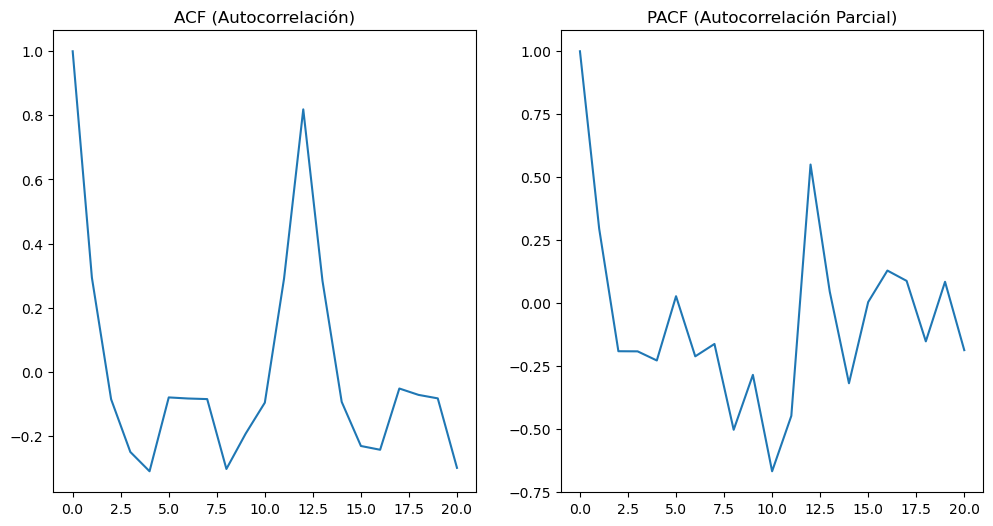

In [43]:
# Graficar ACF y PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(lag_acf)
plt.title('ACF (Autocorrelación)')

plt.subplot(122)
plt.plot(lag_pacf)
plt.title('PACF (Autocorrelación Parcial)')

plt.show()

In [44]:
# Determinamos p y q basados en los gráficos ACF y PACF
# A partir de los gráficos, podemos seleccionar los valores de p y q.
# Por ejemplo, si ACF corta después de lag 1, entonces q=1.
# Y si PACF corta después de lag 1, entonces p=1.

# Ajustamos un modelo ARIMA con p=1, d=1, q=1 (por ejemplo)
model = ARIMA(df["Passengers"], order=(1, 1, 1))
model_fit = model.fit()

# Mostrar resumen del modelo
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -685.406
Date:                Tue, 01 Apr 2025   AIC                           1376.813
Time:                        12:03:58   BIC                           1385.701
Sample:                             0   HQIC                          1380.424
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5611      0.099     -5.660      0.000      -0.755      -0.367
ma.L1          0.9378      0.055     16.956      0.000       0.829       1.046
sigma2       846.6089     93.089      9.095      0.0

ValueError: x and y must have same first dimension, but have shapes (143,) and (144,)

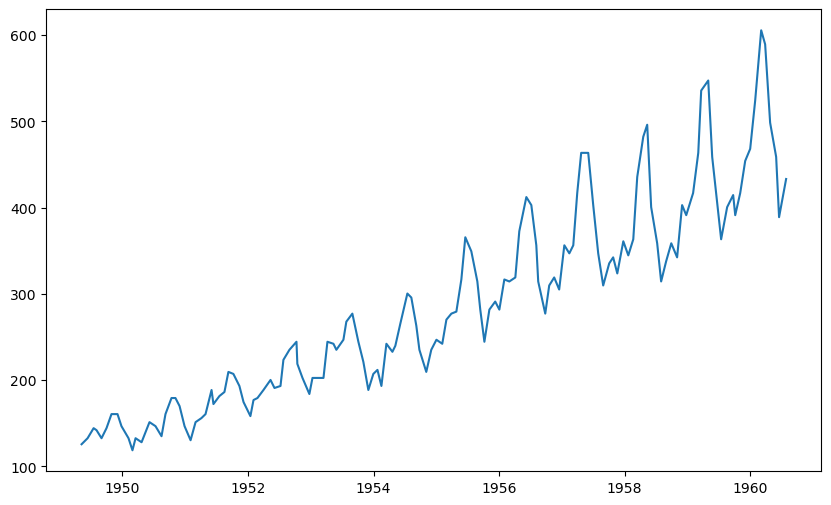

In [46]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(df["Time"], df["Passengers"], label="Serie Original")

# Ajustar la longitud de 'fittedvalues' para que coincida con la de la serie original
plt.plot(df["Time"][1:], model_fit.fittedvalues, label="Ajuste ARIMA (1,1,1)", color='red')

plt.title("Ajuste del modelo ARIMA a la serie temporal")
plt.xlabel("Fecha")
plt.ylabel("Número de pasajeros")
plt.legend()
plt.show()

10. **Decompose the series into its components: trend, seasonality, and residuals.**  
   - Use `seasonal_decompose` from `statsmodels`.  
   - Comment on whether the components show clear patterns.  
   - What are the implications for future forecasting?

---
---